Name: Sang Heon Lee

ID: 20581451

Uwaterloo ID: sh68lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

In [2]:
print(tf.__version__)

2.1.0


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
data_train = pd.read_csv('image_train_Kaggle.csv')

In [5]:
data_test = pd.read_csv('image_test_Kaggle.csv')

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
label_train = data_train.label
data_train = data_train.drop('label', axis=1)

In [8]:
data_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data_train = data_train.to_numpy()

In [10]:
id_test = data_test.ID
data_test = data_test.drop('ID', axis=1)

In [11]:
data_test = data_test.to_numpy()

In [12]:
data_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
data_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
data_train = data_train.reshape(60000,28,28,1)

In [15]:
data_test = data_test.reshape(10000,28,28,1)

In [16]:
data_train.shape

(60000, 28, 28, 1)

In [17]:
data_test.shape

(10000, 28, 28, 1)

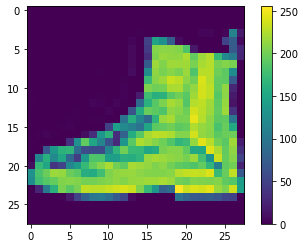

In [18]:
plt.figure()
plt.imshow(data_test[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
data_train = data_train / 255.0

data_test = data_test / 255.0

In [20]:
data_train = np.asarray(data_train)
label_train = np.asarray(label_train)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(data_train, label_train, test_size=0.2, random_state=2020)

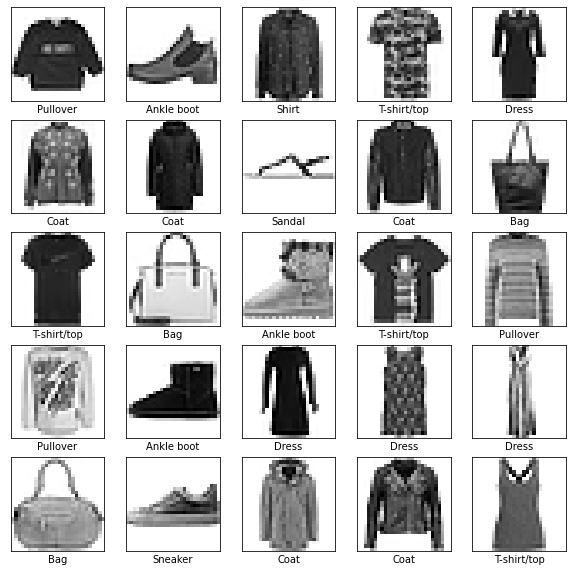

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label_train[i]])
plt.show()

In [23]:
# first initial model
model01 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [98]:
# second model
model02 = Sequential()
model02.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model02.add(MaxPooling2D((2, 2)))
model02.add(Dropout(0.25))

model02.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model02.add(MaxPooling2D(pool_size=(2, 2)))
model02.add(Dropout(0.25))

model02.add(Conv2D(128, (3, 3), activation='relu'))
model02.add(Flatten())

model02.add(Dense(128, activation='relu'))
model02.add(Dropout(0.25))
model02.add(Dense(10, activation='softmax'))


In [91]:
# third model
model03 = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.30),        
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.40),        
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        Dropout(0.30),
        
        Dense(512, activation='relu'),
        Dropout(0.20),
        
        Dense(10, activation='softmax')
    ])
adam = Adam(lr=0.0001, decay=1e-6)

In [108]:
# model with dropout and L2 regularizer
model04 = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2',
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.30),        
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.40),        
        
        Flatten(),
        
        Dense(1024, activation='relu', kernel_regularizer='l2'),
        Dropout(0.30),
        
        Dense(512, activation='relu', kernel_regularizer='l2'),
        Dropout(0.20),
        
        Dense(10, activation='softmax')
    ])

In [99]:
# check the summary of model
model02.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 3, 3, 128)       

In [93]:
model03.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 128)     

In [109]:
model04.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_36 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 13, 13, 128)     

In [94]:
model01.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model02.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [96]:
model03.compile(optimizer=adam,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [110]:
model04.compile(optimizer=adam,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [101]:
# result 10
model02.fit(data_train, label_train, batch_size=64, epochs=200, verbose=1)

Train on 60000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 53us/sample - loss: 1.7585 - accuracy: 0.7076
Epoch 2/200
60000/60000 [==============================] - 3s 43us/sample - loss: 1.6823 - accuracy: 0.7833
Epoch 3/200
60000/60000 [==============================] - 3s 43us/sample - loss: 1.6612 - accuracy: 0.8038
Epoch 4/200
60000/60000 [==============================] - 3s 43us/sample - loss: 1.6481 - accuracy: 0.8167
Epoch 5/200
60000/60000 [==============================] - 3s 44us/sample - loss: 1.6381 - accuracy: 0.8266
Epoch 6/200
60000/60000 [==============================] - 3s 46us/sample - loss: 1.6319 - accuracy: 0.8324
Epoch 7/200
60000/60000 [==============================] - 3s 44us/sample - loss: 1.6261 - accuracy: 0.8381
Epoch 8/200
60000/60000 [==============================] - 3s 43us/sample - loss: 1.6210 - accuracy: 0.8426
Epoch 9/200
60000/60000 [==============================] - 3s 43us/sample - loss: 1.6169 - accuracy: 0.8459
Epoch

60000/60000 [==============================] - 2s 42us/sample - loss: 1.5229 - accuracy: 0.9391
Epoch 150/200
60000/60000 [==============================] - 3s 42us/sample - loss: 1.5226 - accuracy: 0.9399
Epoch 151/200
60000/60000 [==============================] - 3s 42us/sample - loss: 1.5235 - accuracy: 0.9391
Epoch 152/200
60000/60000 [==============================] - 2s 42us/sample - loss: 1.5229 - accuracy: 0.9398
Epoch 153/200
60000/60000 [==============================] - 2s 42us/sample - loss: 1.5223 - accuracy: 0.9404
Epoch 154/200
60000/60000 [==============================] - 3s 43us/sample - loss: 1.5230 - accuracy: 0.9395
Epoch 155/200
60000/60000 [==============================] - 3s 42us/sample - loss: 1.5221 - accuracy: 0.9403
Epoch 156/200
60000/60000 [==============================] - 3s 44us/sample - loss: 1.5218 - accuracy: 0.9405
Epoch 157/200
60000/60000 [==============================] - 3s 44us/sample - loss: 1.5215 - accuracy: 0.9410
Epoch 158/200
60000/6000

___

Model3 hyperparameters setting and fitting

In [120]:
# result 08
model03.fit(data_train, label_train, batch_size=128, epochs=150, verbose=1)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4853 - accuracy: 0.9759
Epoch 2/150
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4863 - accuracy: 0.9748
Epoch 3/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4870 - accuracy: 0.9742
Epoch 4/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4868 - accuracy: 0.9743
Epoch 5/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4870 - accuracy: 0.9741
Epoch 6/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4868 - accuracy: 0.9743
Epoch 7/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4862 - accuracy: 0.9749
Epoch 8/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4865 - accuracy: 0.9747
Epoch 9/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4877 - accuracy: 0.9

60000/60000 [==============================] - 7s 119us/sample - loss: 1.4823 - accuracy: 0.9787
Epoch 148/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4830 - accuracy: 0.9781
Epoch 149/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4824 - accuracy: 0.9788
Epoch 150/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4834 - accuracy: 0.9778


In [121]:
model03.fit(data_train, label_train, batch_size=128, epochs=150, verbose=1)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4823 - accuracy: 0.9788
Epoch 2/150
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4822 - accuracy: 0.9790
Epoch 3/150
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4837 - accuracy: 0.9774
Epoch 4/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4834 - accuracy: 0.9777
Epoch 5/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4829 - accuracy: 0.9783 - loss: 1.4830 - accuracy: 
Epoch 6/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4829 - accuracy: 0.9783
Epoch 7/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4832 - accuracy: 0.9779
Epoch 8/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4844 - accuracy: 0.9768
Epoch 9/150
60000/60000 [==============================] - 7s 119us/sample - 

60000/60000 [==============================] - 7s 123us/sample - loss: 1.4833 - accuracy: 0.9779
Epoch 76/150
60000/60000 [==============================] - 8s 125us/sample - loss: 1.4826 - accuracy: 0.9786
Epoch 77/150
60000/60000 [==============================] - 7s 124us/sample - loss: 1.4821 - accuracy: 0.9790
Epoch 78/150
60000/60000 [==============================] - 7s 124us/sample - loss: 1.4829 - accuracy: 0.9782
Epoch 79/150
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4819 - accuracy: 0.9791
Epoch 80/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4816 - accuracy: 0.9795
Epoch 81/150
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4816 - accuracy: 0.9795
Epoch 82/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4828 - accuracy: 0.9783
Epoch 83/150
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4820 - accuracy: 0.9791
Epoch 84/150
60000/6000

In [122]:
model03.fit(data_train, label_train, batch_size=128, epochs=150, verbose=1)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 7s 124us/sample - loss: 1.4797 - accuracy: 0.9814
Epoch 2/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4805 - accuracy: 0.9806
Epoch 3/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4803 - accuracy: 0.9808
Epoch 4/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4806 - accuracy: 0.9805
Epoch 5/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4811 - accuracy: 0.9801
Epoch 6/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4810 - accuracy: 0.9802
Epoch 7/150
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4801 - accuracy: 0.9811
Epoch 8/150
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4819 - accuracy: 0.9793
Epoch 9/150
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4810 - accuracy: 0.9

60000/60000 [==============================] - 7s 121us/sample - loss: 1.4789 - accuracy: 0.9822
Epoch 148/150
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4801 - accuracy: 0.9810
Epoch 149/150
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4792 - accuracy: 0.9819
Epoch 150/150
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4797 - accuracy: 0.9815


In [123]:
model03.fit(data_train, label_train, batch_size=128, epochs=100, verbose=1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4796 - accuracy: 0.9815
Epoch 2/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4804 - accuracy: 0.9808
Epoch 3/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4805 - accuracy: 0.9807
Epoch 4/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4797 - accuracy: 0.9814
Epoch 5/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4800 - accuracy: 0.9811
Epoch 6/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4794 - accuracy: 0.9818 - loss: 1.4792 - accuracy
Epoch 7/100
60000/60000 [==============================] - 8s 126us/sample - loss: 1.4799 - accuracy: 0.9813
Epoch 8/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4797 - accuracy: 0.9814
Epoch 9/100
60000/60000 [==============================] - 7s 118us/sample - lo

In [124]:
model03.fit(data_train, label_train, batch_size=128, epochs=100, verbose=1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4790 - accuracy: 0.9821
Epoch 2/100
60000/60000 [==============================] - 7s 123us/sample - loss: 1.4776 - accuracy: 0.9836
Epoch 3/100
60000/60000 [==============================] - 8s 127us/sample - loss: 1.4784 - accuracy: 0.9827
Epoch 4/100
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4781 - accuracy: 0.9831
Epoch 5/100
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4788 - accuracy: 0.9824
Epoch 6/100
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4782 - accuracy: 0.9829
Epoch 7/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4774 - accuracy: 0.9837
Epoch 8/100
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4791 - accuracy: 0.9821
Epoch 9/100
60000/60000 [==============================] - 7s 117us/sample - loss: 1.4785 - accuracy: 0.9

Epoch 75/100
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4775 - accuracy: 0.9836
Epoch 76/100
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4768 - accuracy: 0.9843
Epoch 77/100
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4772 - accuracy: 0.9840
Epoch 78/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4773 - accuracy: 0.9839
Epoch 79/100
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4779 - accuracy: 0.9833
Epoch 80/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4781 - accuracy: 0.9830
Epoch 81/100
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4772 - accuracy: 0.9839
Epoch 82/100
60000/60000 [==============================] - 8s 125us/sample - loss: 1.4777 - accuracy: 0.9834
Epoch 83/100
60000/60000 [==============================] - 7s 123us/sample - loss: 1.4788 - accuracy: 0.9823
Epoch 84/1

In [131]:
model03.fit(data_train, label_train, batch_size=128, epochs=200, verbose=1)

Train on 60000 samples
Epoch 1/200
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4769 - accuracy: 0.9843
Epoch 2/200
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4774 - accuracy: 0.9837
Epoch 3/200
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4791 - accuracy: 0.9820
Epoch 4/200
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4785 - accuracy: 0.9826
Epoch 5/200
60000/60000 [==============================] - 8s 125us/sample - loss: 1.4769 - accuracy: 0.9843
Epoch 6/200
60000/60000 [==============================] - 8s 126us/sample - loss: 1.4775 - accuracy: 0.9836
Epoch 7/200
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4779 - accuracy: 0.9833
Epoch 8/200
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4773 - accuracy: 0.9838
Epoch 9/200
60000/60000 [==============================] - 8s 133us/sample - loss: 1.4764 - accuracy: 0.9

Epoch 148/200
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4764 - accuracy: 0.9847
Epoch 149/200
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4765 - accuracy: 0.9846
Epoch 150/200
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4753 - accuracy: 0.9859
Epoch 151/200
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4755 - accuracy: 0.9856
Epoch 152/200
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4755 - accuracy: 0.9857
Epoch 153/200
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4774 - accuracy: 0.9838
Epoch 154/200
60000/60000 [==============================] - 7s 122us/sample - loss: 1.4778 - accuracy: 0.9834
Epoch 155/200
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4776 - accuracy: 0.9835
Epoch 156/200
60000/60000 [==============================] - 7s 119us/sample - loss: 1.4790 - accuracy: 0.9821 -

In [137]:
model03.fit(data_train, label_train, batch_size=128, epochs=100, verbose=1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 123us/sample - loss: 1.4754 - accuracy: 0.9858
Epoch 2/100
60000/60000 [==============================] - 7s 120us/sample - loss: 1.4760 - accuracy: 0.9851
Epoch 3/100
60000/60000 [==============================] - 7s 123us/sample - loss: 1.4774 - accuracy: 0.9838
Epoch 4/100
60000/60000 [==============================] - 7s 123us/sample - loss: 1.4776 - accuracy: 0.9835
Epoch 5/100
60000/60000 [==============================] - 7s 117us/sample - loss: 1.4764 - accuracy: 0.9847
Epoch 6/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4770 - accuracy: 0.9841
Epoch 7/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4761 - accuracy: 0.9851
Epoch 8/100
60000/60000 [==============================] - 7s 121us/sample - loss: 1.4758 - accuracy: 0.9853
Epoch 9/100
60000/60000 [==============================] - 8s 132us/sample - loss: 1.4756 - accuracy: 0.9

In [143]:
# train set split for result18
X_train, X_val, y_train, y_val = train_test_split(data_train, label_train, test_size=0.2, random_state=2020)

In [144]:
# fitting for result18
model03.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1)

Train on 48000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 128us/sample - loss: 1.4757 - accuracy: 0.9854
Epoch 2/100
48000/48000 [==============================] - 6s 116us/sample - loss: 1.4750 - accuracy: 0.9861
Epoch 3/100
48000/48000 [==============================] - 6s 119us/sample - loss: 1.4754 - accuracy: 0.9857
Epoch 4/100
48000/48000 [==============================] - 6s 116us/sample - loss: 1.4750 - accuracy: 0.9861
Epoch 5/100
48000/48000 [==============================] - 6s 121us/sample - loss: 1.4747 - accuracy: 0.9865
Epoch 6/100
48000/48000 [==============================] - 6s 127us/sample - loss: 1.4759 - accuracy: 0.9852
Epoch 7/100
48000/48000 [==============================] - ETA: 0s - loss: 1.4756 - accuracy: 0.98 - 6s 129us/sample - loss: 1.4756 - accuracy: 0.9855
Epoch 8/100
48000/48000 [==============================] - 6s 125us/sample - loss: 1.4754 - accuracy: 0.9858
Epoch 9/100
48000/48000 [==============================] - 6s 1

In [151]:
# train set split for result19
X_train19, X_val19, y_train19, y_val19 = train_test_split(data_train, label_train, test_size=0.15, random_state=2020)

In [152]:
# fitting for result19
model03.fit(X_train19, y_train19, batch_size=128, epochs=100, verbose=1, validation_data=(X_val19, y_val19))

Train on 48000 samples, validate on 9000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 135us/sample - loss: 1.4756 - accuracy: 0.9855 - val_loss: 1.4687 - val_accuracy: 0.9924
Epoch 2/100
48000/48000 [==============================] - 6s 124us/sample - loss: 1.4748 - accuracy: 0.9863 - val_loss: 1.4682 - val_accuracy: 0.9930
Epoch 3/100
48000/48000 [==============================] - 6s 124us/sample - loss: 1.4744 - accuracy: 0.9867 - val_loss: 1.4682 - val_accuracy: 0.9930
Epoch 4/100
48000/48000 [==============================] - 6s 125us/sample - loss: 1.4741 - accuracy: 0.9870 - val_loss: 1.4693 - val_accuracy: 0.9919
Epoch 5/100
48000/48000 [==============================] - 6s 126us/sample - loss: 1.4748 - accuracy: 0.9864 - val_loss: 1.4681 - val_accuracy: 0.9930
Epoch 6/100
48000/48000 [==============================] - 6s 124us/sample - loss: 1.4734 - accuracy: 0.9877 - val_loss: 1.4684 - val_accuracy: 0.9928
Epoch 7/100
48000/48000 [====================

In [158]:
# train set split for result20
X_train20, X_val20, y_train20, y_val20 = train_test_split(data_train, label_train, test_size=0.3, random_state=2020)

In [159]:
# fitting for result20
model03.fit(X_train20, y_train20, batch_size=128, epochs=100, verbose=1, validation_data=(X_val20, y_val20))

Train on 48000 samples, validate on 18000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 136us/sample - loss: 1.4739 - accuracy: 0.9873 - val_loss: 1.4697 - val_accuracy: 0.9914
Epoch 2/100
48000/48000 [==============================] - 6s 131us/sample - loss: 1.4741 - accuracy: 0.9871 - val_loss: 1.4706 - val_accuracy: 0.9905
Epoch 3/100
48000/48000 [==============================] - 6s 132us/sample - loss: 1.4748 - accuracy: 0.9863 - val_loss: 1.4694 - val_accuracy: 0.9917
Epoch 4/100
48000/48000 [==============================] - 6s 132us/sample - loss: 1.4730 - accuracy: 0.9881 - val_loss: 1.4695 - val_accuracy: 0.9917
Epoch 5/100
48000/48000 [==============================] - 6s 133us/sample - loss: 1.4731 - accuracy: 0.9880 - val_loss: 1.4691 - val_accuracy: 0.9921
Epoch 6/100
48000/48000 [==============================] - 6s 132us/sample - loss: 1.4737 - accuracy: 0.9874 - val_loss: 1.4693 - val_accuracy: 0.9918
Epoch 7/100
48000/48000 [===================

In [167]:
# train set split for result21
X_train21, X_val21, y_train21, y_val21 = train_test_split(data_train, label_train, test_size=0.27, random_state=2020)

In [168]:
# fitting for result21
model03.fit(X_train21, y_train21, batch_size=128, epochs=100, verbose=1, validation_data=(X_val21, y_val21))

Train on 43799 samples, validate on 16201 samples
Epoch 1/100
43799/43799 [==============================] - 7s 156us/sample - loss: 1.4751 - accuracy: 0.9860 - val_loss: 1.4705 - val_accuracy: 0.9907
Epoch 2/100
43799/43799 [==============================] - 6s 140us/sample - loss: 1.4748 - accuracy: 0.9862 - val_loss: 1.4705 - val_accuracy: 0.9906
Epoch 3/100
43799/43799 [==============================] - 6s 142us/sample - loss: 1.4736 - accuracy: 0.9876 - val_loss: 1.4699 - val_accuracy: 0.9912
Epoch 4/100
43799/43799 [==============================] - 6s 141us/sample - loss: 1.4736 - accuracy: 0.9875 - val_loss: 1.4698 - val_accuracy: 0.9914
Epoch 5/100
43799/43799 [==============================] - 6s 142us/sample - loss: 1.4742 - accuracy: 0.9869 - val_loss: 1.4702 - val_accuracy: 0.9909
Epoch 6/100
43799/43799 [==============================] - 6s 141us/sample - loss: 1.4741 - accuracy: 0.9870 - val_loss: 1.4698 - val_accuracy: 0.9913
Epoch 7/100
43799/43799 [===================

In [174]:
# train set split for result22
X_train22, X_val22, y_train22, y_val22 = train_test_split(data_train, label_train, test_size=0.2, random_state=2020)

In [175]:
# fitting for result22
model03.fit(X_train22, y_train22, batch_size=128, epochs=100, verbose=1, validation_data=(X_val22, y_val22))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 139us/sample - loss: 1.4740 - accuracy: 0.9871 - val_loss: 1.4705 - val_accuracy: 0.9907
Epoch 2/100
48000/48000 [==============================] - 6s 132us/sample - loss: 1.4734 - accuracy: 0.9878 - val_loss: 1.4718 - val_accuracy: 0.9893
Epoch 3/100
48000/48000 [==============================] - 6s 134us/sample - loss: 1.4737 - accuracy: 0.9874 - val_loss: 1.4711 - val_accuracy: 0.9900
Epoch 4/100
48000/48000 [==============================] - 8s 160us/sample - loss: 1.4735 - accuracy: 0.9876 - val_loss: 1.4710 - val_accuracy: 0.9902
Epoch 5/100
48000/48000 [==============================] - 8s 163us/sample - loss: 1.4730 - accuracy: 0.9881 - val_loss: 1.4718 - val_accuracy: 0.9893
Epoch 6/100
48000/48000 [==============================] - 8s 160us/sample - loss: 1.4729 - accuracy: 0.9882 - val_loss: 1.4707 - val_accuracy: 0.9904
Epoch 7/100
48000/48000 [===================

In [181]:
# train set split for result23
X_train23, X_val23, y_train23, y_val23 = train_test_split(data_train, label_train, test_size=0.15, random_state=2020)

In [182]:
# fitting for result23
model03.fit(X_train23, y_train23, batch_size=128, epochs=100, verbose=1, validation_data=(X_val23, y_val23))

Train on 51000 samples, validate on 9000 samples
Epoch 1/100
51000/51000 [==============================] - 7s 135us/sample - loss: 1.4739 - accuracy: 0.9872 - val_loss: 1.4704 - val_accuracy: 0.9908
Epoch 2/100
51000/51000 [==============================] - 7s 128us/sample - loss: 1.4737 - accuracy: 0.9875 - val_loss: 1.4714 - val_accuracy: 0.9897
Epoch 3/100
51000/51000 [==============================] - 6s 125us/sample - loss: 1.4730 - accuracy: 0.9882 - val_loss: 1.4729 - val_accuracy: 0.9882
Epoch 4/100
51000/51000 [==============================] - 6s 125us/sample - loss: 1.4733 - accuracy: 0.9878 - val_loss: 1.4722 - val_accuracy: 0.9891
Epoch 5/100
51000/51000 [==============================] - 6s 125us/sample - loss: 1.4737 - accuracy: 0.9874 - val_loss: 1.4706 - val_accuracy: 0.9906
Epoch 6/100
51000/51000 [==============================] - 6s 125us/sample - loss: 1.4731 - accuracy: 0.9881 - val_loss: 1.4700 - val_accuracy: 0.9911
Epoch 7/100
51000/51000 [====================

In [188]:
# train set split for result24
X_train24, X_val24, y_train24, y_val24 = train_test_split(data_train, label_train, test_size=0.25, random_state=2020)

In [189]:
# fitting for result24
model03.fit(X_train24, y_train24, batch_size=128, epochs=100, verbose=1, validation_data=(X_val24, y_val24))

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 7s 165us/sample - loss: 1.4723 - accuracy: 0.9888 - val_loss: 1.4702 - val_accuracy: 0.9909
Epoch 2/100
45000/45000 [==============================] - 6s 131us/sample - loss: 1.4731 - accuracy: 0.9881 - val_loss: 1.4702 - val_accuracy: 0.9909
Epoch 3/100
45000/45000 [==============================] - 6s 130us/sample - loss: 1.4727 - accuracy: 0.9884 - val_loss: 1.4706 - val_accuracy: 0.9905
Epoch 4/100
45000/45000 [==============================] - 6s 131us/sample - loss: 1.4721 - accuracy: 0.9891 - val_loss: 1.4697 - val_accuracy: 0.9914
Epoch 5/100
45000/45000 [==============================] - 6s 131us/sample - loss: 1.4735 - accuracy: 0.9876 - val_loss: 1.4706 - val_accuracy: 0.9905
Epoch 6/100
45000/45000 [==============================] - 6s 131us/sample - loss: 1.4724 - accuracy: 0.9887 - val_loss: 1.4711 - val_accuracy: 0.9901
Epoch 7/100
45000/45000 [===================

In [195]:
# train set split for result25
X_train25, X_val25, y_train25, y_val25 = train_test_split(data_train, label_train, test_size=0.25, random_state=2020)

In [196]:
# fitting for result25
model03.fit(X_train25, y_train25, batch_size=128, epochs=100, verbose=1, validation_data=(X_val25, y_val25))

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 7s 149us/sample - loss: 1.4723 - accuracy: 0.9889 - val_loss: 1.4708 - val_accuracy: 0.9904
Epoch 2/100
45000/45000 [==============================] - 7s 149us/sample - loss: 1.4721 - accuracy: 0.9890 - val_loss: 1.4707 - val_accuracy: 0.9905
Epoch 3/100
45000/45000 [==============================] - 7s 149us/sample - loss: 1.4720 - accuracy: 0.9891 - val_loss: 1.4712 - val_accuracy: 0.9899
Epoch 4/100
45000/45000 [==============================] - 7s 148us/sample - loss: 1.4725 - accuracy: 0.9887 - val_loss: 1.4710 - val_accuracy: 0.9902
Epoch 5/100
45000/45000 [==============================] - 7s 149us/sample - loss: 1.4723 - accuracy: 0.9888 - val_loss: 1.4707 - val_accuracy: 0.9904
Epoch 6/100
45000/45000 [==============================] - 7s 149us/sample - loss: 1.4724 - accuracy: 0.9888 - val_loss: 1.4715 - val_accuracy: 0.9896
Epoch 7/100
45000/45000 [===================

___

In [112]:
# result 14
model04.fit(data_train, label_train, batch_size=64, epochs=70, verbose=1)

Train on 60000 samples
Epoch 1/70
60000/60000 [==============================] - 10s 164us/sample - loss: 1.6201 - accuracy: 0.9303
Epoch 2/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6175 - accuracy: 0.9312
Epoch 3/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6199 - accuracy: 0.9298
Epoch 4/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6194 - accuracy: 0.9294
Epoch 5/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6181 - accuracy: 0.9308
Epoch 6/70
60000/60000 [==============================] - 10s 164us/sample - loss: 1.6182 - accuracy: 0.9309
Epoch 7/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6171 - accuracy: 0.9301
Epoch 8/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6175 - accuracy: 0.9295
Epoch 9/70
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6152 - accuracy: 0.9

___

### Prediction Output

In [197]:
# softmax layer for prediction
probability_model = tf.keras.Sequential([model03,
                                         tf.keras.layers.Softmax()])

In [198]:
predictions = probability_model.predict(data_test)

In [199]:
label_pred_test = []

for i in range(len(predictions)):
    label_pred_test.append(np.argmax(predictions[i]))


In [200]:
result01 = np.vstack((id_test, label_pred_test)).T

In [201]:
i = 25
resultdf = pd.DataFrame(result01)
resultdf.columns = ['ID', 'label']
resultdf.to_csv("result" + str(i) + ".csv", index=False)

### Result

In [130]:
# epoch: 10 => 0.89040
# epoch: 50 => 0.88320
# epoch: 30 => 0.89040
# epoch: 20 => 0.89130
# epoch: 100 => 0.88600

# model6: model02, batch_size=128, epochs=25, verbose=1, validation_data=(X_val, y_val) => 0.90570
# model7: model02, batch_size=128, epochs=25, verbose=1 => 0.91580
# model8: model03, batch_size=128, epochs=25, verbose=1 => 0.11260 ??
# model9: model02, batch_size=128, epochs=25, verbose=1 => 0.91130
# model10: model02, batch_size=128, epochs=150, verbose=1 => 0.92400

# model11: model03, batch_size=128, epochs=150, verbose=1 => 0.93290
# model12: model03, batch_size=128, epochs=200, verbose=1 => 0.94050
# model13: model02, batch_size=64, epochs=200, verbose=1 => 0.92540
# model14: model04, batch_size=64, epochs=120, verbose=1 => 0.93160
# model15: model03, batch_size=128, epochs=200+150+150+150+150+100+100, verbose=1 => 0.94520***

# model16: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200, verbose=1 =>
# model17: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100, verbose=1 =>
# model18: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100, verbose=1 =>
# model19: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100, verbose=1 =>
# model20: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100+100, verbose=1 =>

# model21: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100+100+100, verbose=1 =>
# model22: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100+100+100+100, verbose=1 =>
# model23: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100+100+100+100+100, verbose=1 =>
# model24: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100+100+100+100+100+100, verbose=1 =>
# model25: model03, batch_size=128, epochs=200+150+150+150+150+100+100+200+100+100+100+100+100+100+100+100+100, verbose=1 =>

